<a href="https://colab.research.google.com/github/Estela25/PRACTICAS-PROGRAMACION-III/blob/main/semana%2011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#1. importar las librerias
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow_datasets as tfds

In [18]:
#2. cargamos dataset en variables
dataset , metadata = tfds.load("mnist", as_supervised=True, with_info=True)
datos_entrenamiento, datos_prueba = dataset["train"], dataset["test"]
print(datos_entrenamiento)

<PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [19]:
#3. 
numeros_letras = ["cero", "uno", "dos", "tres", "custro", "cinco", 
 "seix", "siete", "ocho", "nueve"
]

In [24]:
#4. pasar en variable los datos de entrenamiento y pruebas
print(metadata.splits)
numeros_ejemplo_entrenamiento = metadata.splits["train"].num_examples
numeros_ejemplo_prueba = metadata.splits["test"].num_examples

{'test': <SplitInfo num_examples=10000, num_shards=1>, 'train': <SplitInfo num_examples=60000, num_shards=1>}


In [25]:
#5. funcion normalizadora de pixeles
def normalizacion(img, labels):
  img = tf.cast(img, tf.float32)
  img /= 255 #150/255 = 0.58
  return img, labels

In [26]:
#6. llamamos la funcion normalizadora 
"""for img, label in datos_entrenamiento.take(1):
  print( img.numpy()/255 )
"""
daptos_entremaniento = datos_entrenamiento.map(normalizacion)
datos_prueba = datos_prueba.map(normalizacion)

In [27]:
#7. estructuramos la red
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), #capa de entrada de 28*28*1 canal
    tf.keras.layers.Dense(64, activation=tf.nn.relu), #capa oculta con 64 neuronas, con la funcion de activacion RELU, nos da valores entre 0 y 1
    tf.keras.layers.Dense(64, activation=tf.nn.relu), #capa oculta con 64 neuronas, con la funcion de activacion RELU, nos da valores entre 0 y 1
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #capa de salida con 10 neuronas, con la funcion de activacion softmax es exclusiva para clasificacion de imagenes
])

In [29]:
#8. copilamos el modelo 
modelo.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [30]:
#9. entrenamiento por lote 
size_lote = 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(numeros_ejemplo_entrenamiento).batch(size_lote)
datos_prueba = datos_prueba.repeat().shuffle(numeros_ejemplo_prueba).batch(size_lote)

In [31]:
#10. realizamos el entrenamiento
modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch=math.ceil(numeros_ejemplo_entrenamiento/size_lote))

Epoch 1/5
1875/1875 [==============================] - 9s 3ms/step - loss: 1.5101 - accuracy: 0.8019
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3869 - accuracy: 0.9013
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3166 - accuracy: 0.9180
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2643 - accuracy: 0.9316
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2168 - accuracy: 0.9414


In [32]:
#11. evaluacion de aprendisaje 
test_loss, test_accuracy = modelo.evaluate(datos_prueba, steps=math.ceil(numeros_ejemplo_prueba/size_lote))
print("resultados de la prueba", test_loss, test_accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 2.4466 - accuracy: 0.0988
resultados de la prueba 2.4465622901916504 0.09884185343980789


5 5


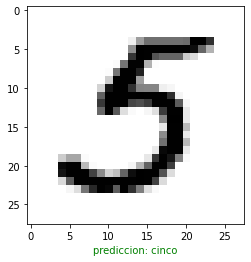

In [38]:
#13, 15. hacer una prediccion
i=0
for miImg, etiqueta in datos_entrenamiento.take(1):
  etiqueta = etiqueta.numpy()
  img = miImg[i].numpy().reshape(1,28,28,1)
  prediccion = modelo.predict(img, batch_size=1)

  valor_predicho = np.argmax(prediccion)
  print(valor_predicho, etiqueta[i])

  plt.grid(False)
  plt.imshow(img[0,...,0], cmap=plt.cm.binary)
  plt.xlabel("prediccion: {}" .format(numeros_letras[valor_predicho]), color="green")
